In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/dm_audio_interspeech/2075_concatenate_dm_4featu.csv')
df = pd.read_csv('/content/drive/MyDrive/DatabaseDistorted/final_tii_all_finaldata/features/2075_concatenate_dm_4featu.csv')
# mfcc_simple_mean_newdm_2075.csv
# df = pd.read_csv('/content/drive/MyDrive/DatabaseDistorted/final_tii_all_finaldata/features/mfcc_simple_mean_newdm_2075.csv')

df = df.drop(['Unnamed: 0'], axis = 1)
df.shape

(2075, 181)

In [ ]:
np.random.seed(42)
siz=415
df_read = df.copy()
df1 = df_read.sample(siz)
df_read = df_read.drop(df1.index)
df2 = df_read.sample(siz)
df_read = df_read.drop(df2.index)
df3 = df_read.sample(siz)
df_read = df_read.drop(df3.index)
df4 = df_read.sample(siz)
df_read = df_read.drop(df4.index)
df5 = df_read.copy()

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)

(415, 181)
(415, 181)
(415, 181)
(415, 181)
(415, 181)


In [ ]:
q = list(df1.index)+list(df2.index)+list(df3.index)+list(df4.index)+list(df5.index)
print(df1.index)

Int64Index([ 881,  453, 2004, 1353,  281,  941, 1185, 1159, 1138,  599,
            ...
             834, 1730,  353, 1345, 1190, 1375,  185,  701, 1671, 1982],
           dtype='int64', length=415)


In [ ]:
train = pd.concat([df1,df2,df3,df4], axis=0)
test = df5.copy()

Y_train = np.array(train['class'])
X_train= np.array(train.drop(['class'],axis=1))
# X_train=X_train.reshape(X_train.shape[0], 1 , X_train.shape[1])

Y_val=np.array(test['class'])
X_val = np.array(test.drop(['class'],axis=1))
# X_val=X_val.reshape(X_val.shape[0], 1 , X_val.shape[1])

# Reshape your data for input to the GRU layer (assuming your data is 2D)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(1660, 180, 1)
(1660,)


In [ ]:
from keras.optimizers import Adam

# Define the GRU model for regression
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(GRU(units=32, return_sequences=True))
model.add(GRU(units=16))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mae')

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/1000
26/26 [==============================] - 7s 58ms/step - loss: 10.4220 - val_loss: 9.1167
Epoch 2/1000
26/26 [==============================] - 0s 19ms/step - loss: 9.1381 - val_loss: 7.7891
Epoch 3/1000
26/26 [==============================] - 0s 19ms/step - loss: 7.5679 - val_loss: 6.0505
Epoch 4/1000
26/26 [==============================] - 0s 19ms/step - loss: 5.5066 - val_loss: 3.9282
Epoch 5/1000
26/26 [==============================] - 0s 19ms/step - loss: 3.3217 - val_loss: 2.2375
Epoch 6/1000
26/26 [==============================] - 0s 19ms/step - loss: 2.0928 - val_loss: 1.7961
Epoch 7/1000
26/26 [==============================] - 0s 19ms/step - loss: 1.8542 - val_loss: 1.7970
Epoch 8/1000
26/26 [==============================] - 1s 19ms/step - loss: 1.8336 - val_loss: 1.7839
Epoch 9/1000
26/26 [==============================] - 0s 19ms/step - loss: 1.8174 - val_loss: 1.7694
Epoch 10/1000
26/26 [==============================] - 1s 27ms/step - loss: 1.8029 - val_l

In [ ]:
#run
import time
st = time.time()
p1 = np.array(model(X_val)).flatten()
end = time.time()
# print(end, st, len(p1))
print((end-st)/len(p1))
p2 = np.array(model(X_train)).flatten()
print(X_train.shape)
print(X_val.shape)

6.682844047086785e-05
(1660, 180, 1)
(415, 180, 1)


In [ ]:
from scipy import stats
from scipy.stats import kendalltau
# print(np.corrcoef(p2, Y_train), stats.spearmanr(p2, Y_train), kendalltau(p2,Y_train).correlation)
print(np.corrcoef(p1, Y_val)[1][0], stats.spearmanr(p1, Y_val).correlation, kendalltau(p1,Y_val).correlation)

0.7500975613871322 0.7475940112412154 0.5568566268046643


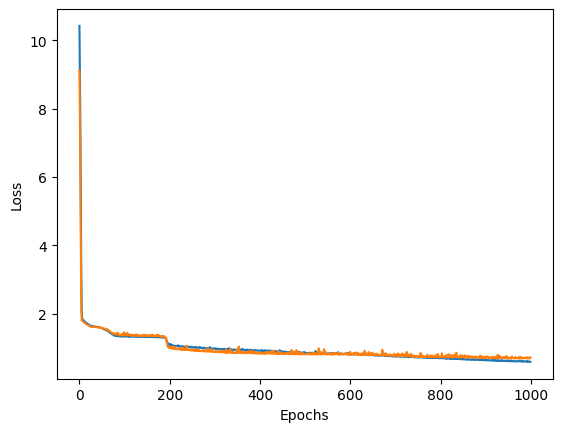

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("audio_dm_3_featu_.jpg")